## Modelo ANOVA de una vía

Para ajustar un modelo ANOVA de 1 vía se puede usar la función `lm()`.

In [1]:
datos = read.csv("StudentsPerformance.csv")
dim(datos)

[1] 1000    8

Para saber las variables que se usarán, se ejecutará el comando `names()`.

In [2]:
names(datos)

[1] "gender"                      "race.ethnicity"             
[3] "parental.level.of.education" "lunch"                      
[5] "test.preparation.course"     "math.score"                 
[7] "reading.score"               "writing.score"

Para este ejercicio se usarán las variables `test.preparation.course` y `math.score`. El objetivo es ver si existe alguna diferencia en las calificaciones de mateáticas de quienes tomaron el curso de preparación y quienes no.

A continuación se muestran algunos gráficos descriptivos para ver tanto las categorías del factor, así como el comportamiento de la variable respuesta.

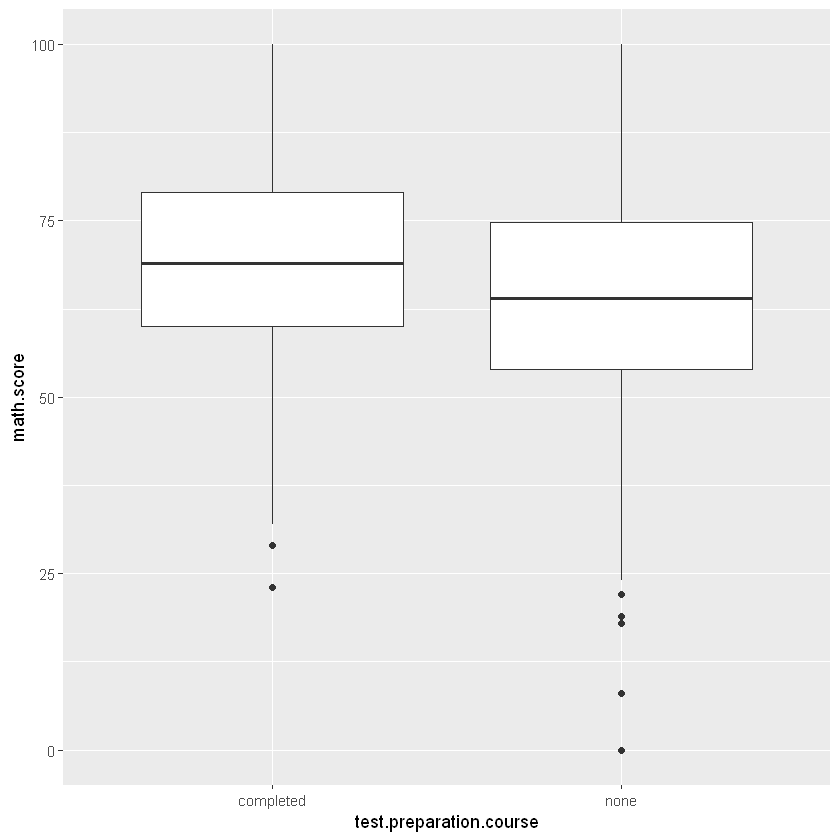

In [6]:
library(ggplot2)
ggplot(datos,aes(test.preparation.course,math.score))+geom_boxplot()

### Ajuste del modelo

Para ajustar el modelo se usa el siguiente código.

In [8]:
modelo = lm(math.score~test.preparation.course,data=datos)
summary(modelo)


Call:
lm(formula = math.score ~ test.preparation.course, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.078 -10.078  -0.078   9.922  35.922 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  69.6955     0.7890  88.330  < 2e-16 ***
test.preparation.coursenone  -5.6176     0.9848  -5.705 1.54e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.93 on 998 degrees of freedom
Multiple R-squared:  0.03158,	Adjusted R-squared:  0.03061 
F-statistic: 32.54 on 1 and 998 DF,  p-value: 1.536e-08


In [17]:
library(agricolae)
medias=LSD.test(modelo,"test.preparation.course",console=TRUE)


Study: modelo ~ "test.preparation.course"

LSD t Test for math.score 

Mean Square Error:  222.8817 

test.preparation.course,  means and individual ( 95 %) CI

          math.score      std   r      LCL      UCL Min Max
completed   69.69553 14.44470 358 68.14717 71.24389  23 100
none        64.07788 15.19238 642 62.92165 65.23411   0 100

Alpha: 0.05 ; DF Error: 998
Critical Value of t: 1.962344 

Groups according to probability of means differences and alpha level( 0.05 )

Treatments with the same letter are not significantly different.

          math.score groups
completed   69.69553      a
none        64.07788      b


### Predicción

Para realizar la predicción de un modelo, se puede usar la función `predict()`.

In [23]:
nuevos = data.frame("test.preparation.course"=c("none","completed"))
predict(modelo,newdata=nuevos,interval="confidence")

,fit,lwr,upr
1,64.07788,62.92165,65.23411
2,69.69553,68.14717,71.24389


In [24]:
nuevos = data.frame("test.preparation.course"=c("none","completed"))
predict(modelo,newdata=nuevos,interval="prediction")

,fit,lwr,upr
1,64.07788,34.75881,93.39696
2,69.69553,40.35837,99.03269
